# DSDP Data Science Challenge Starter Notebook

### Import Dependencies

In [317]:
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

### Load the data

In [318]:
train_df = pd.read_excel('Vehicle_Population_Train_Test_use.xlsx', sheet_name = 'train')

## <span style="color:red">Data Visualizations and Cleaning</span>
### Look at the data

In [319]:
train_df.head()

,Date,Vehicle Category,GVWR Class,Fuel Type,Model Year,Fuel Technology,Electric Mile Range,Number of Vehicles Registered at the Same Address,Region,Vehicle Population
0,2020,P,Not Applicable,Gasoline,2015,ICE,Not Applicable,≥4,Statewide,312920
1,2020,P,Not Applicable,Gasoline,2016,ICE,Not Applicable,≥4,Statewide,312842
2,2020,P,Not Applicable,Gasoline,2017,ICE,Not Applicable,≥4,Statewide,303437
3,2020,P,Not Applicable,Gasoline,2019,ICE,Not Applicable,≥4,Statewide,281921
4,2020,P,Not Applicable,Gasoline,2018,ICE,Not Applicable,≥4,Statewide,281326


In [320]:
rename_columns_dict = {"Vehicle Category": "Vehicle_Category", "GVWR Class": "GVWR_Class", "Fuel Type": "Fuel_Type", "Model Year":"Model_Year",  "Fuel Technology":"Fuel_Technology", "Electric Mile Range":"Electric_Mile_Range", "Number of Vehicles Registered at the Same Address":"Number_of_Vehicles_Registered_at_the_Same_Address", "Vehicle Population":"Vehicle_Population"}
train_df = train_df.rename(columns=rename_columns_dict)

### Look at Metadata

In [321]:
train_df.shape

(48599, 10)

In [322]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48599 entries, 0 to 48598
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Date                                               48599 non-null  int64 
 1   Vehicle_Category                                   48599 non-null  object
 2   GVWR_Class                                         48599 non-null  object
 3   Fuel_Type                                          48599 non-null  object
 4   Model_Year                                         48599 non-null  object
 5   Fuel_Technology                                    48599 non-null  object
 6   Electric_Mile_Range                                48599 non-null  object
 7   Number_of_Vehicles_Registered_at_the_Same_Address  48599 non-null  object
 8   Region                                             48599 non-null  object
 9   Vehicle_Populatio

In [323]:
#TODO: Are there any columns which data type needs to be corrected?
# If there are any that you believe should be switched, you can do so here.

#train_df['Variable'] = train_df['Variable'].astype('category')
#train_df['Variable'] = train_df['Variable'].astype('int')

# Here we are removing all of the observations when Model Year is unknown and then casting it to numerical (int)
# Is this the best way to handle this numerical data? What else can be done about Unknown values in numerical fields.
# Comment these lines out if you want to see the data visualized with the "unknown" data but be aware that the model code will not run

#train_df.drop(train_df[train_df['Model_Year'] == 'Unknown'].index, inplace = True)
#train_df['Model_Year'] = train_df['Model_Year'].astype(int)

In [324]:
train_df.Model_Year.replace('Unknown',np.nan, inplace=True)  

train_df.Model_Year.fillna(train_df.Model_Year.mean(),inplace=True)

In [325]:

train_df['Model_Year'] = train_df['Model_Year'].astype(int)

In [326]:
# train_df.drop(train_df[train_df['Number_of_Vehicles_Registered_at_the_Same_Address'] == 'Unknown'].index, inplace = True)

In [327]:
# train_df.drop(train_df[train_df['Fuel_Type'] == 'Unknown'].index, inplace = True)

In [328]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48599 entries, 0 to 48598
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Date                                               48599 non-null  int64 
 1   Vehicle_Category                                   48599 non-null  object
 2   GVWR_Class                                         48599 non-null  object
 3   Fuel_Type                                          48599 non-null  object
 4   Model_Year                                         48599 non-null  int32 
 5   Fuel_Technology                                    48599 non-null  object
 6   Electric_Mile_Range                                48599 non-null  object
 7   Number_of_Vehicles_Registered_at_the_Same_Address  48599 non-null  object
 8   Region                                             48599 non-null  object
 9   Vehicle_Populatio

In [329]:
train_df[['Electric_Mile_Range', 'Number_of_Vehicles_Registered_at_the_Same_Address', 'Vehicle_Category', 'GVWR_Class', 'Fuel_Type', 'Fuel_Technology', 'Region']] = train_df[['Electric_Mile_Range', 'Number_of_Vehicles_Registered_at_the_Same_Address', 'Vehicle_Category', 'GVWR_Class', 'Fuel_Type', 'Fuel_Technology', 'Region' ]].astype ('category')


In [330]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48599 entries, 0 to 48598
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   Date                                               48599 non-null  int64   
 1   Vehicle_Category                                   48599 non-null  category
 2   GVWR_Class                                         48599 non-null  category
 3   Fuel_Type                                          48599 non-null  category
 4   Model_Year                                         48599 non-null  int32   
 5   Fuel_Technology                                    48599 non-null  category
 6   Electric_Mile_Range                                48599 non-null  category
 7   Number_of_Vehicles_Registered_at_the_Same_Address  48599 non-null  category
 8   Region                                             48599 non-null  category


### Check for duplicates

In [331]:
train_df.duplicated().sum()

13

In [332]:
train_df.drop_duplicates(keep = 'last', inplace = True)

### Look at summary data

In [333]:
train_df.describe(include='all')

,Date,Vehicle_Category,GVWR_Class,Fuel_Type,Model_Year,Fuel_Technology,Electric_Mile_Range,Number_of_Vehicles_Registered_at_the_Same_Address,Region,Vehicle_Population
count,48586.000000,48586,48586,48586,48586.000000,48586,48586,48586,48586,48586.000000
unique,NaN,13,10,6,NaN,4,6,5,1,NaN
top,NaN,T6,Not Applicable,Gasoline,NaN,ICE,Not Applicable,≥4,Statewide,NaN
freq,NaN,10523,17011,21750,NaN,43837,43837,14343,48586,NaN
mean,2017.453217,NaN,NaN,NaN,1997.506380,NaN,NaN,NaN,NaN,3479.532684
std,1.686529,NaN,NaN,NaN,13.392411,NaN,NaN,NaN,NaN,18747.824109
min,2015.000000,NaN,NaN,NaN,1970.000000,NaN,NaN,NaN,NaN,1.000000
25%,2016.000000,NaN,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,5.000000
50%,2017.000000,NaN,NaN,NaN,1998.000000,NaN,NaN,NaN,NaN,39.000000
75%,2019.000000,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,385.000000


In [334]:
for c in train_df:
    if train_df[c].dtype != 'int64':
        print(train_df[c].value_counts())

Vehicle_Category
T6    10523
T3     4786
T4     4627
P      4574
T2     3971
T1     3307
B      2765
BS     2607
MC     2422
MH     2353
BT     2290
T7     2236
T5     2125
Name: count, dtype: int64
GVWR_Class
Not Applicable    17011
Unknown            9866
2                  5097
1                  3767
6                  2349
7                  2279
8                  2236
3                  2125
5                  1930
4                  1926
Name: count, dtype: int64
Fuel_Type
Gasoline       21750
Diesel         18463
Natural Gas     4175
Electric        3965
Hydrogen         147
Unknown           86
Name: count, dtype: int64
Model_Year
1997    1739
2012    1415
2013    1349
2015    1318
2014    1300
2016    1251
2002    1225
2011    1201
2003    1192
2008    1152
2001    1151
2009    1149
1999    1148
2010    1122
2007    1121
2000    1118
2004    1096
2006    1087
2005    1062
1998    1041
1996    1014
2017    1013
1993     989
1995     985
1994     979
1985     951
1987     938


### Check for missing variables

In [335]:
train_df.isna().sum()/(len(train_df))*100

Date                                                 0.0
Vehicle_Category                                     0.0
GVWR_Class                                           0.0
Fuel_Type                                            0.0
Model_Year                                           0.0
Fuel_Technology                                      0.0
Electric_Mile_Range                                  0.0
Number_of_Vehicles_Registered_at_the_Same_Address    0.0
Region                                               0.0
Vehicle_Population                                   0.0
dtype: float64

In [336]:
#TODO: There aren't any "missing" values, but is there a placeholder value for missing values?  Maybe we want to try dropping those rows?
train_df = train_df[train_df.Vehicle_Population != 'placeholder missing value']

In [337]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48586 entries, 0 to 48598
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   Date                                               48586 non-null  int64   
 1   Vehicle_Category                                   48586 non-null  category
 2   GVWR_Class                                         48586 non-null  category
 3   Fuel_Type                                          48586 non-null  category
 4   Model_Year                                         48586 non-null  int32   
 5   Fuel_Technology                                    48586 non-null  category
 6   Electric_Mile_Range                                48586 non-null  category
 7   Number_of_Vehicles_Registered_at_the_Same_Address  48586 non-null  category
 8   Region                                             48586 non-null  category
 9   

### Visualize variables

In [338]:
train_df.columns

Index(['Date', 'Vehicle_Category', 'GVWR_Class', 'Fuel_Type', 'Model_Year',
       'Fuel_Technology', 'Electric_Mile_Range',
       'Number_of_Vehicles_Registered_at_the_Same_Address', 'Region',
       'Vehicle_Population'],
      dtype='object')

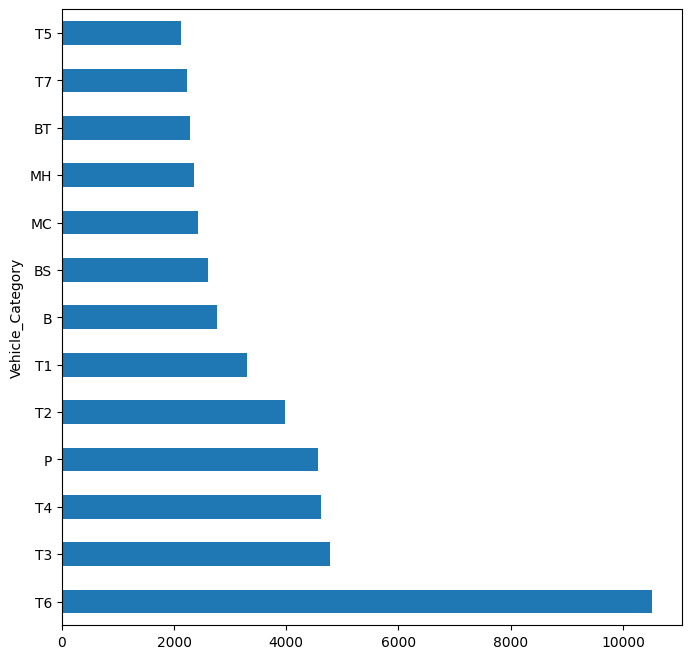

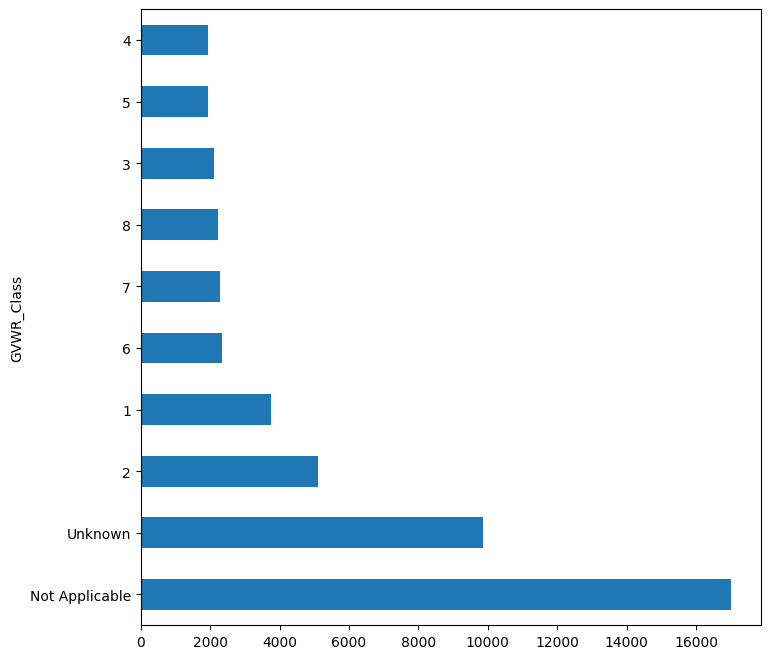

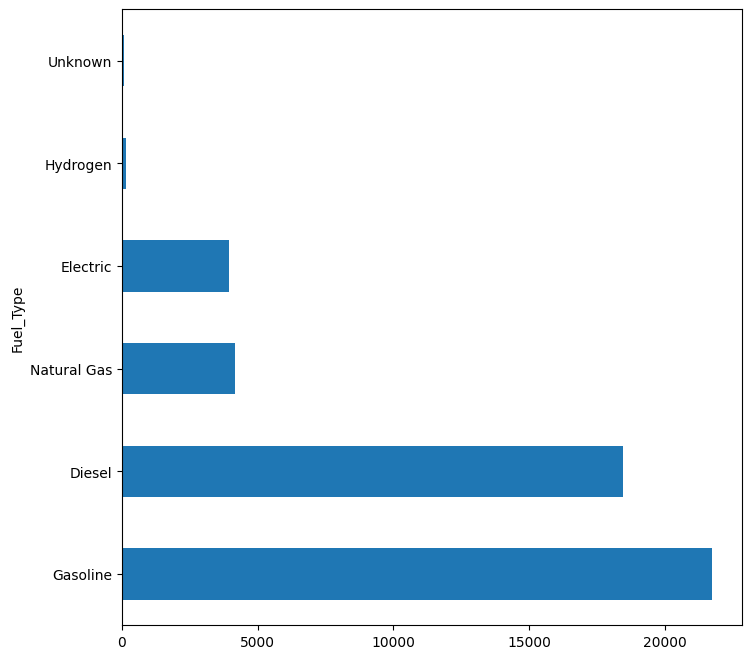

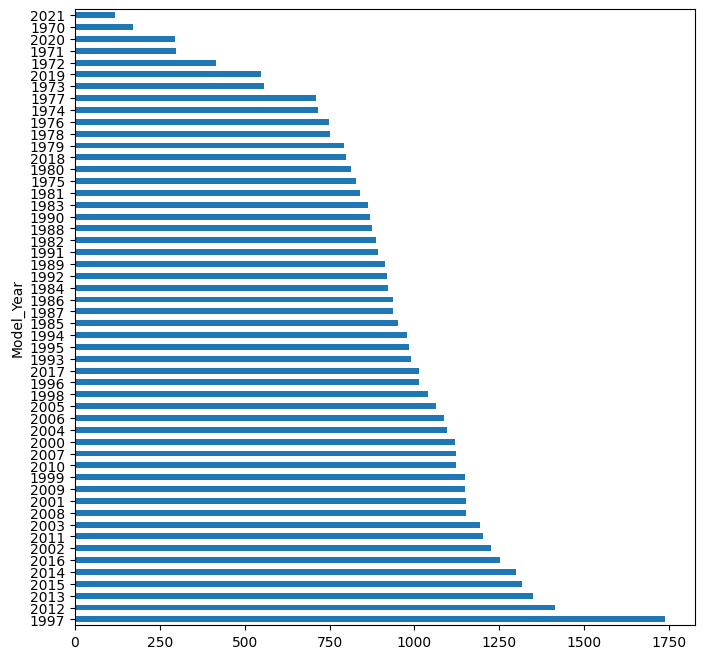

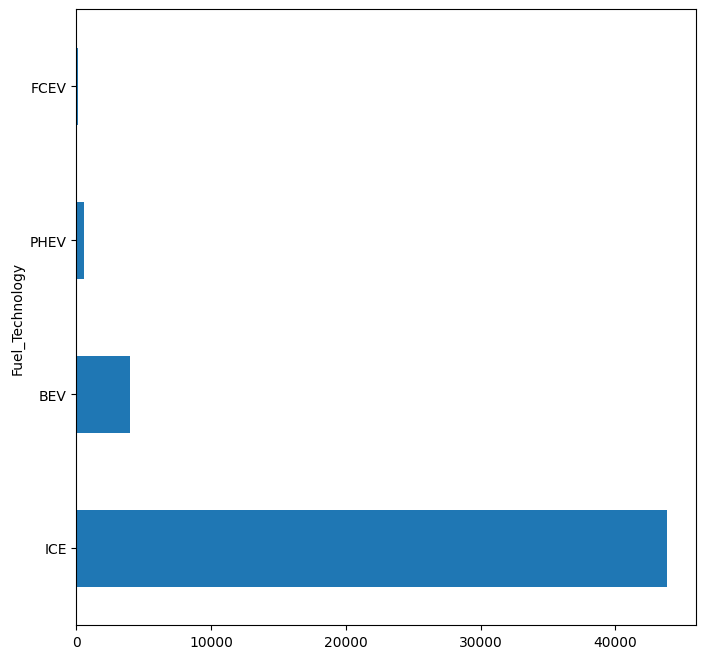

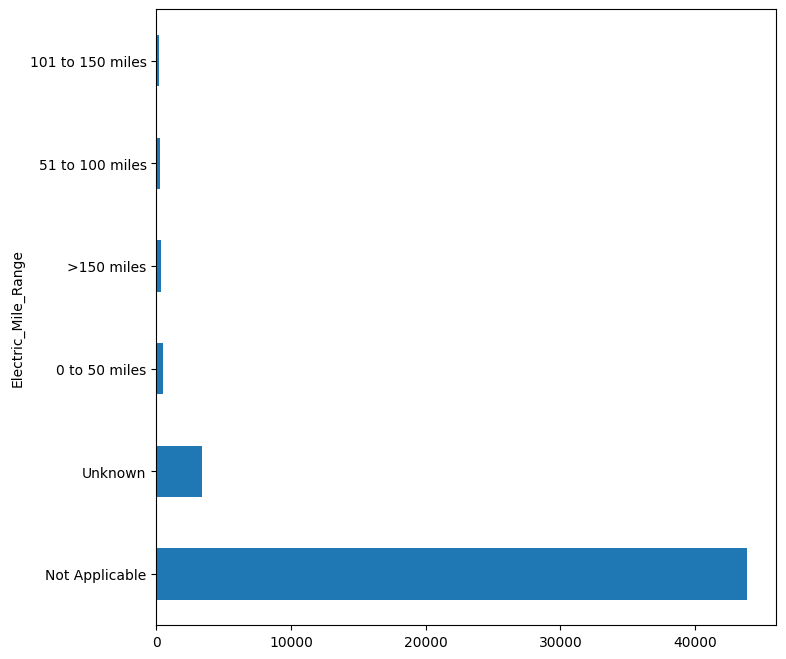

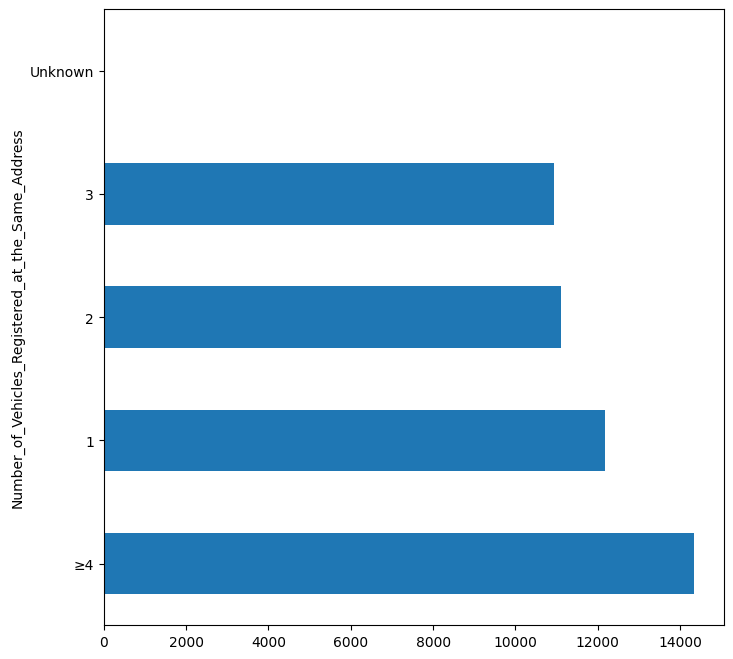

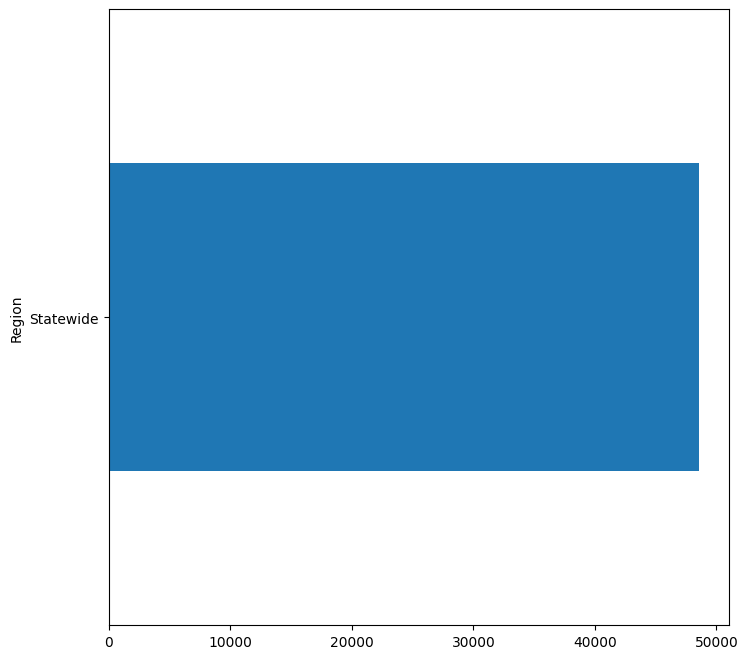

In [339]:
for c in train_df:
    if train_df[c].dtype != 'int64':
        train_df[c].value_counts().plot(kind='barh')
        plt.show()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Model_Year'}>],
       [<Axes: title={'center': 'Vehicle_Population'}>, <Axes: >]],
      dtype=object)

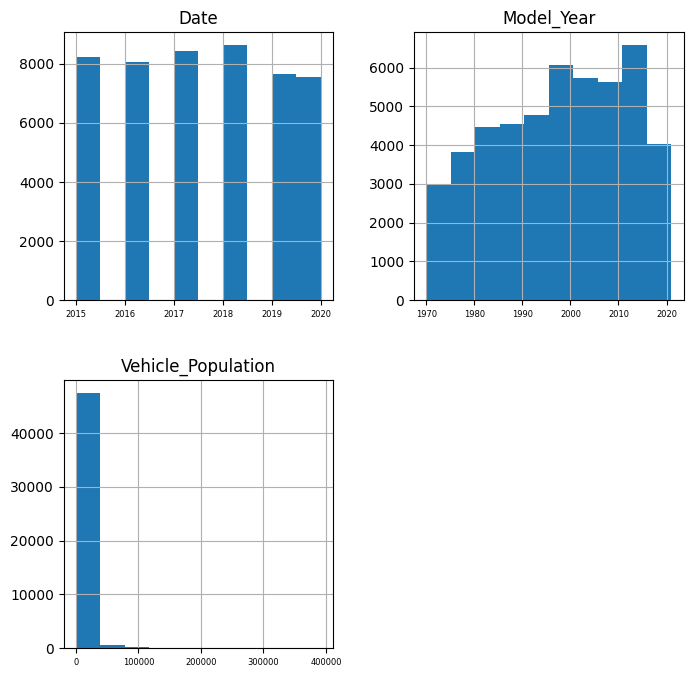

In [340]:
train_df.hist(xlabelsize=6)

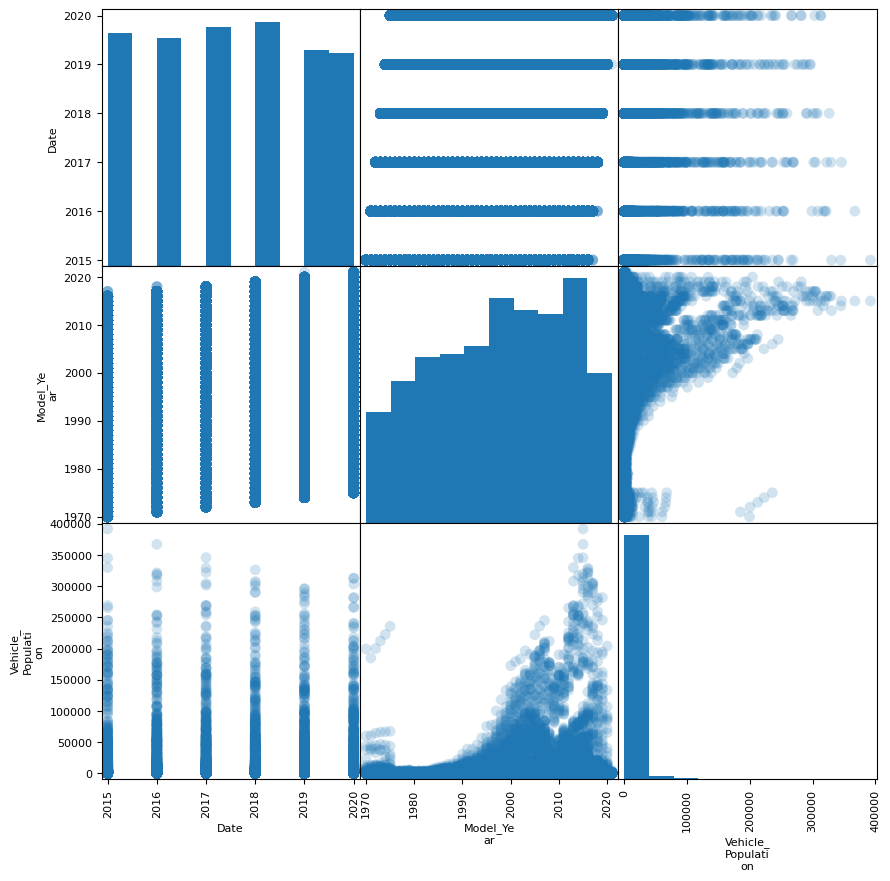

In [341]:
axs = pd.plotting.scatter_matrix(train_df, figsize=(10,10), marker = 'o', hist_kwds = {'bins': 10}, s = 60, alpha = 0.2)

def wrap(txt, width=8):
    '''helper function to wrap text for long labels'''
    import textwrap
    return '\n'.join(textwrap.wrap(txt, width))

for ax in axs[:,0]: # the left boundary
    ax.set_ylabel(wrap(ax.get_ylabel()), size = 8)
    ax.set_xlim([None, None])
    ax.set_ylim([None, None])

for ax in axs[-1,:]: # the lower boundary
    ax.set_xlabel(wrap(ax.get_xlabel()), size = 8)
    ax.set_xlim([None, None])
    ax.set_ylim([None, None])

<Axes: >

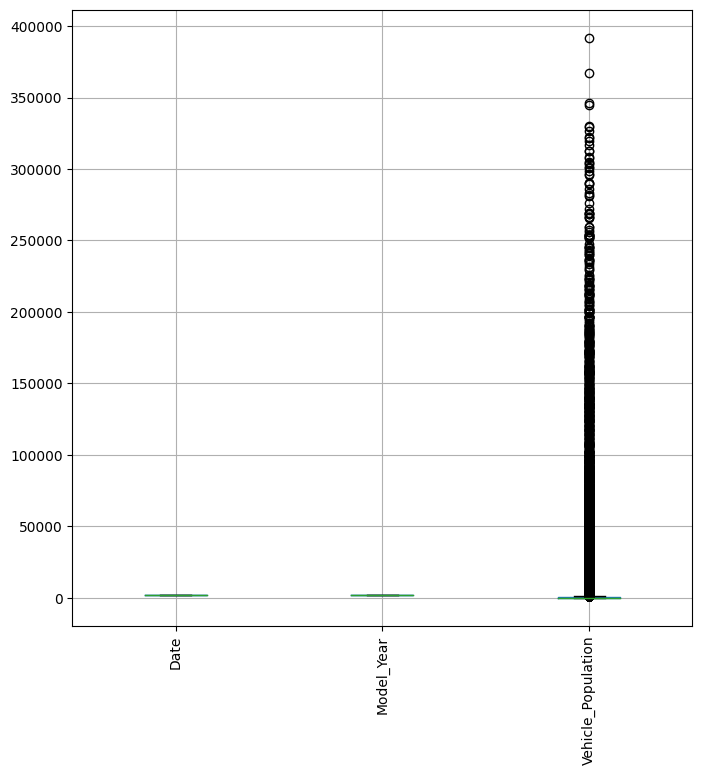

In [342]:
train_df.boxplot(rot=90)

<Axes: xlabel='Date', ylabel='Vehicle_Population'>

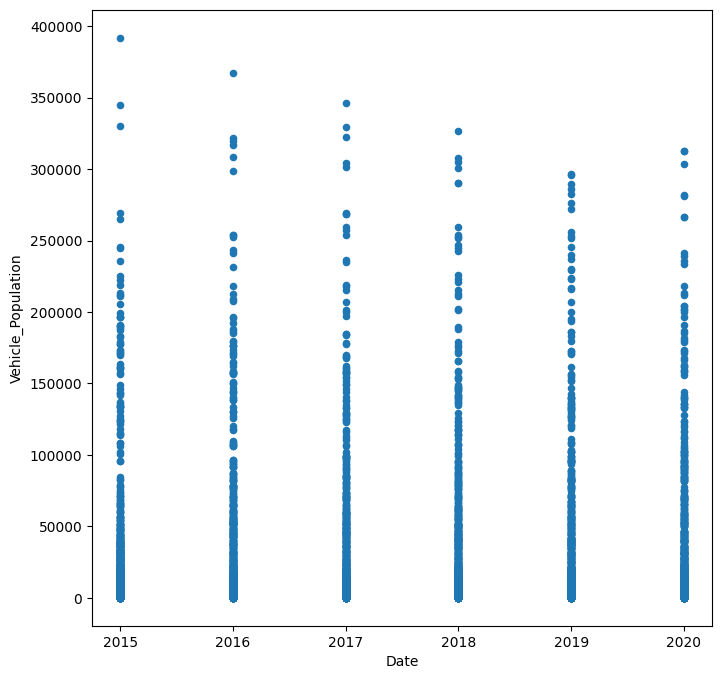

In [343]:
train_df.plot.scatter(x='Date' , y='Vehicle_Population')

<Axes: xlabel='Fuel_Type', ylabel='Vehicle_Population'>

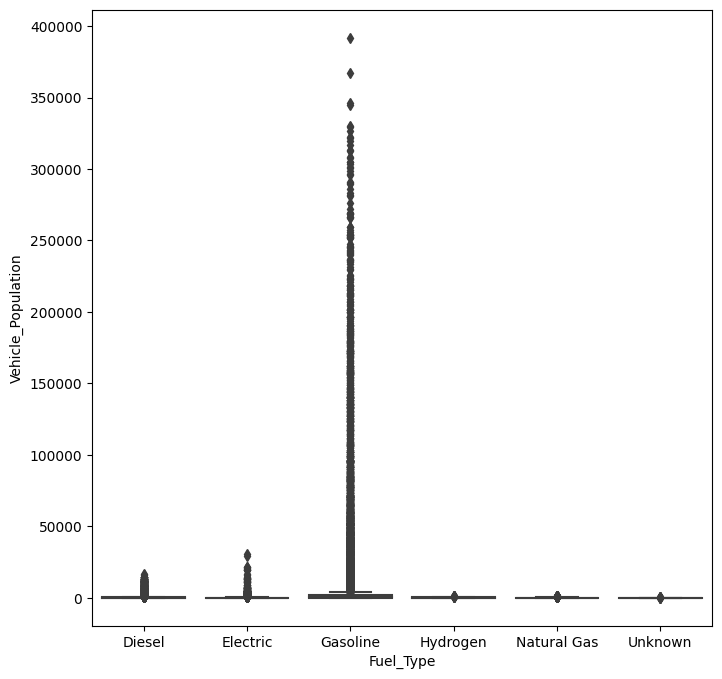

In [344]:
# TODO: Copy this code into a new cell and replace with several other combinations of features to investigate other relationships
sns.boxplot(x='Fuel_Type', y='Vehicle_Population', data=train_df)

<Axes: xlabel='Vehicle_Category', ylabel='Vehicle_Population'>

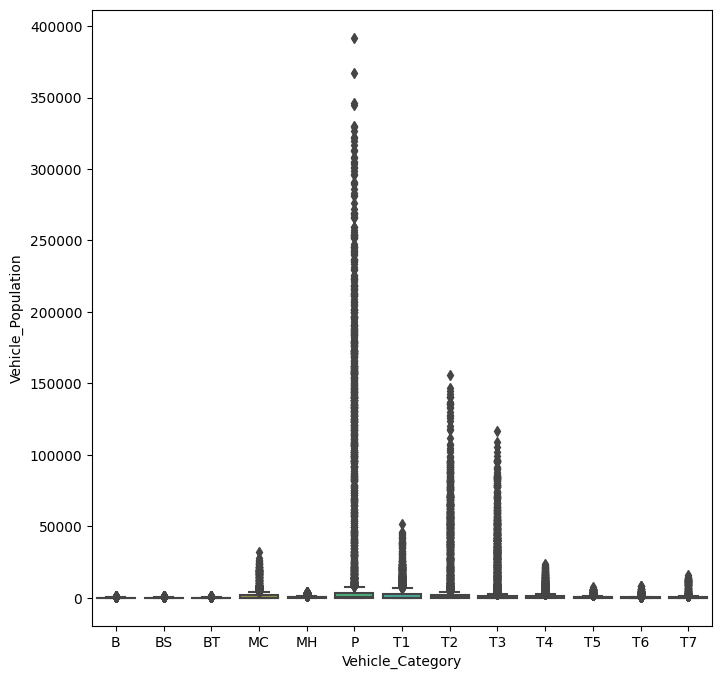

In [345]:
sns.boxplot(x='Vehicle_Category', y='Vehicle_Population', data=train_df)

<Axes: xlabel='Number_of_Vehicles_Registered_at_the_Same_Address', ylabel='Vehicle_Population'>

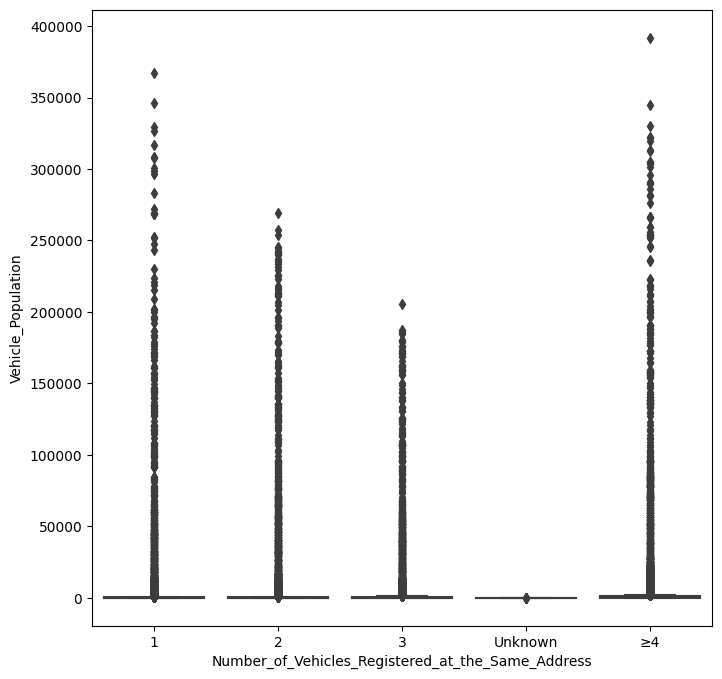

In [346]:
sns.boxplot(x = 'Number_of_Vehicles_Registered_at_the_Same_Address', y = 'Vehicle_Population', data = train_df)

<Axes: xlabel='Fuel_Technology', ylabel='Vehicle_Population'>

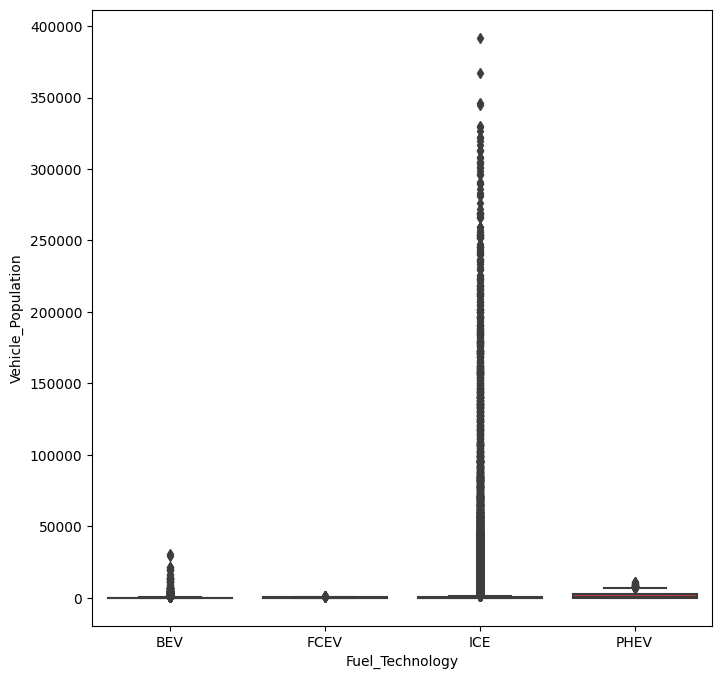

In [347]:
sns.boxplot(x = 'Fuel_Technology', y = 'Vehicle_Population', data = train_df)

<Axes: xlabel='Electric_Mile_Range', ylabel='Vehicle_Population'>

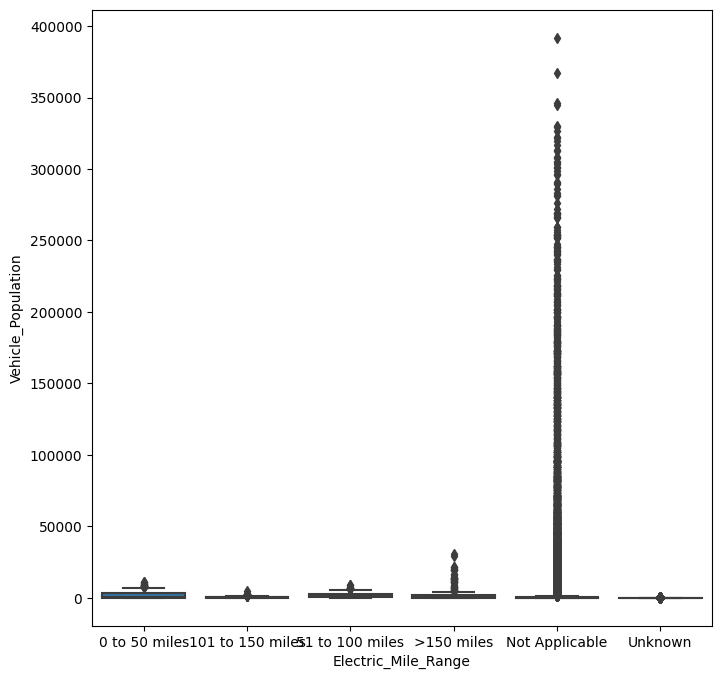

In [348]:
sns.boxplot(x = 'Electric_Mile_Range', y = 'Vehicle_Population', data = train_df)

In [349]:
#TODO: Feel free to generate any other visualizations that you're interested in to continue digging into the data.

### Feature Engineering

In [350]:
#TODO: Perform any feature engineering and check with visualizations, recommend using a temporary dataframe for trial, and then putting the actual code into the feature_engineering function below to be able to replicate the same transformations to test data later on
train_df['Age']=train_df.Date-train_df.Model_Year
train_df['Age']=train_df['Age'].astype(int)

## <span style="color:red">Feature Selection</span>

In [351]:
#TODO: If you want to remove any of the variables from your analysis, do that here!
continuous_variables = ['Date','Model_Year','Age']
categorical_variables = ['Vehicle_Category','GVWR_Class', 'Fuel_Type', 'Fuel_Technology', 'Electric_Mile_Range', 'Number_of_Vehicles_Registered_at_the_Same_Address', 'Region']
target = 'Vehicle_Population'

### One Hot Encoding

In [352]:
train_df

,Date,Vehicle_Category,GVWR_Class,Fuel_Type,Model_Year,Fuel_Technology,Electric_Mile_Range,Number_of_Vehicles_Registered_at_the_Same_Address,Region,Vehicle_Population,Age
0,2020,P,Not Applicable,Gasoline,2015,ICE,Not Applicable,≥4,Statewide,312920,5
1,2020,P,Not Applicable,Gasoline,2016,ICE,Not Applicable,≥4,Statewide,312842,4
2,2020,P,Not Applicable,Gasoline,2017,ICE,Not Applicable,≥4,Statewide,303437,3
3,2020,P,Not Applicable,Gasoline,2019,ICE,Not Applicable,≥4,Statewide,281921,1
4,2020,P,Not Applicable,Gasoline,2018,ICE,Not Applicable,≥4,Statewide,281326,2
...,...,...,...,...,...,...,...,...,...,...,...
48594,2015,B,Not Applicable,Diesel,1978,ICE,Not Applicable,1,Statewide,1,37
48595,2015,B,Not Applicable,Diesel,1975,ICE,Not Applicable,2,Statewide,1,40
48596,2015,B,Not Applicable,Diesel,1973,ICE,Not Applicable,3,Statewide,1,42
48597,2015,B,Not Applicable,Diesel,1971,ICE,Not Applicable,2,Statewide,1,44


In [353]:
X = train_df.drop(columns=target)
y = train_df[target]

In [354]:
def get_ohe(categorical_variables, X):
    one_hot_encoder = OneHotEncoder()
    one_hot_encoder.fit(X[categorical_variables].astype(str))
    return one_hot_encoder

#TODO: if you want to do any additional feature_engineering, you can do so within this function
# we do this in a function, so that we can apply the same transformations to the test data later on
def feature_engineering(continuous_variables, categorical_variables, X, one_hot_encoder):
    X_ohed = one_hot_encoder.transform(X[categorical_variables].astype(str)).toarray()
    X_ohed = pd.DataFrame(X_ohed,
                      columns=one_hot_encoder.get_feature_names_out(categorical_variables))
    # continuous_handling(X,continuous_variables)
    X = pd.concat([X[continuous_variables].reset_index(), X_ohed.reset_index()], axis=1)
    X = X.drop(columns=['index'])
    return X


In [355]:
one_hot_encoder = get_ohe(categorical_variables, X)
X = feature_engineering(continuous_variables, categorical_variables, X, one_hot_encoder)
X.head()

,Date,Model_Year,Age,Vehicle_Category_B,Vehicle_Category_BS,Vehicle_Category_BT,Vehicle_Category_MC,Vehicle_Category_MH,Vehicle_Category_P,Vehicle_Category_T1,...,Electric_Mile_Range_51 to 100 miles,Electric_Mile_Range_>150 miles,Electric_Mile_Range_Not Applicable,Electric_Mile_Range_Unknown,Number_of_Vehicles_Registered_at_the_Same_Address_1,Number_of_Vehicles_Registered_at_the_Same_Address_2,Number_of_Vehicles_Registered_at_the_Same_Address_3,Number_of_Vehicles_Registered_at_the_Same_Address_Unknown,Number_of_Vehicles_Registered_at_the_Same_Address_≥4,Region_Statewide
0,2020,2015,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2020,2016,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2020,2017,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2020,2019,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,2020,2018,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Establish helper function to evaluate models.

In [356]:
X = X[['Date','Fuel_Technology_ICE', 'Fuel_Type_Gasoline', 'Vehicle_Category_P', 'Number_of_Vehicles_Registered_at_the_Same_Address_Unknown', 'GVWR_Class_1', 'Model_Year', 'Vehicle_Category_T3', 'Vehicle_Category_T1', 'GVWR_Class_2', 'Number_of_Vehicles_Registered_at_the_Same_Address_3', 'Number_of_Vehicles_Registered_at_the_Same_Address_≥4', 'Age']]

In [357]:
X

,Date,Fuel_Technology_ICE,Fuel_Type_Gasoline,Vehicle_Category_P,Number_of_Vehicles_Registered_at_the_Same_Address_Unknown,GVWR_Class_1,Model_Year,Vehicle_Category_T3,Vehicle_Category_T1,GVWR_Class_2,Number_of_Vehicles_Registered_at_the_Same_Address_3,Number_of_Vehicles_Registered_at_the_Same_Address_≥4,Age
0,2020,1.0,1.0,1.0,0.0,0.0,2015,0.0,0.0,0.0,0.0,1.0,5
1,2020,1.0,1.0,1.0,0.0,0.0,2016,0.0,0.0,0.0,0.0,1.0,4
2,2020,1.0,1.0,1.0,0.0,0.0,2017,0.0,0.0,0.0,0.0,1.0,3
3,2020,1.0,1.0,1.0,0.0,0.0,2019,0.0,0.0,0.0,0.0,1.0,1
4,2020,1.0,1.0,1.0,0.0,0.0,2018,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48581,2015,1.0,0.0,0.0,0.0,0.0,1978,0.0,0.0,0.0,0.0,0.0,37
48582,2015,1.0,0.0,0.0,0.0,0.0,1975,0.0,0.0,0.0,0.0,0.0,40
48583,2015,1.0,0.0,0.0,0.0,0.0,1973,0.0,0.0,0.0,1.0,0.0,42
48584,2015,1.0,0.0,0.0,0.0,0.0,1971,0.0,0.0,0.0,0.0,0.0,44


## <span style="color:red">Modeling</span>

In [360]:
def evaluateRegression(model, train_features, train_labels, val_features, val_labels):
    train_predictions = model.predict(train_features)
    val_predictions = model.predict(val_features)
    train_rmse = math.sqrt(mean_squared_error(train_labels, train_predictions))
    train_mae=mean_absolute_error(train_labels, train_predictions)
    test_rmse = math.sqrt(mean_squared_error(val_labels, val_predictions))
    test_mae=mean_absolute_error(val_labels, val_predictions)
    print('Model Performance')
    print('Train RMSE = {:0.2f}.'.format(train_rmse))
    print('Train MAE = {:0.2f}.'.format(train_mae))
    print('Test RMSE = {:0.2f}.'.format(test_rmse))
    print('Test MAE = {:0.2f}.'.format(test_mae))
    plt.scatter(x=y_val , y=val_predictions)
    plt.xlabel('Actuals')
    plt.title('Validation Set')
    plt.ylabel('Predicted')
    return train_predictions, val_predictions

### Train / test split

In the data science challenge, there is a withheld test set to evaluate your model performance. Since we can not see those test set values, but we want to be able to evaluate our model performance on unseen data, we are going to split our training data into a train and validation set. 

In [361]:
#TODO: Is there a better way to split the data? Perhaps we should take into account our date column...
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.10, random_state = 123)

In [362]:
X_train

,Date,Fuel_Technology_ICE,Fuel_Type_Gasoline,Vehicle_Category_P,Number_of_Vehicles_Registered_at_the_Same_Address_Unknown,GVWR_Class_1,Model_Year,Vehicle_Category_T3,Vehicle_Category_T1,GVWR_Class_2,Number_of_Vehicles_Registered_at_the_Same_Address_3,Number_of_Vehicles_Registered_at_the_Same_Address_≥4,Age
31492,2017,1.0,0.0,0.0,0.0,0.0,1997,0.0,1.0,0.0,0.0,0.0,20
19975,2018,0.0,0.0,1.0,0.0,0.0,2008,0.0,0.0,0.0,0.0,0.0,10
36300,2016,1.0,0.0,0.0,0.0,0.0,2010,0.0,0.0,0.0,0.0,0.0,6
12713,2019,1.0,1.0,0.0,0.0,0.0,2018,0.0,0.0,0.0,0.0,0.0,1
46609,2015,1.0,0.0,0.0,0.0,0.0,2014,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,2019,1.0,1.0,0.0,0.0,1.0,2016,0.0,1.0,0.0,0.0,0.0,3
15377,2018,1.0,1.0,0.0,0.0,1.0,2010,0.0,0.0,0.0,0.0,0.0,8
17730,2018,1.0,0.0,0.0,0.0,0.0,1999,0.0,0.0,0.0,1.0,0.0,19
28030,2017,1.0,0.0,0.0,0.0,0.0,1995,0.0,0.0,0.0,0.0,0.0,22


In [363]:
# test train for 2020 

Linear_Regression perfomed bad

In [364]:
##from sklearn.linear_model import LinearRegression
##from sklearn import metrics


In [365]:
#Multivariate regression
#Identify features going into model and add a constant variable
#Xm = GraduateEarn[['Price','SAT', 'Public']]
#Xm = sm.add_constant(Xm)

#Build the multivariate regression model using training data
#Xm_train, Xm_test, Y_train, Y_test = train_test_split(Xm, Y, test_size= 0.20, random_state = 123)
##lr = LinearRegression()
##lrmodel = lr.fit(X_train, y_train)
##y_train_pred = lr.predict(X_train)
#Predict earnings on test data using multivariate model from training data
##y_val_pred = lr.predict(X_val)

In [366]:
##r_sq = lrmodel.score(X_train, y_train)
##print('R-squared Train Model:', r_sq)

#Look at r-square for the model from test data
##r_sq = lrmodel.score(X_val, y_val)
##print('R-squared Test Model:', r_sq)

In [367]:
#y_val_pred = lrmodel.predict(X_val)

In [368]:
#rmse = mean_squared_error(y_val,y_val_pred)**(1/2)
#print(f'Root Mean Squared Error: {rmse:.2f}')

### Random Forest

In [370]:
rf = RandomForestRegressor()

In [371]:
#TODO: feel free to change these parameters to try out different tuning options!
param_grid = {
    'max_depth': [80, 100, 200, None],
    'max_features': [1, 'sqrt', 'log2', None],
    'n_estimators': [10, 50, 100]  # , 200, 300, 500, 1000]
}


grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,  # parameters to be tuned
                           cv=10,
                           n_jobs=-1,  # -1 means use all available cores
                           verbose=2)


In [372]:
grid_search.fit(X_train, y_train)

print("Best CV accuracy: {}, with parameters: {}".format(
    grid_search.best_score_, grid_search.best_params_))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best CV accuracy: 0.9638143355410419, with parameters: {'max_depth': 80, 'max_features': None, 'n_estimators': 50}


Model Performance
Train RMSE = 2488.89.
Train MAE = 632.80.
Test RMSE = 3885.41.
Test MAE = 943.82.


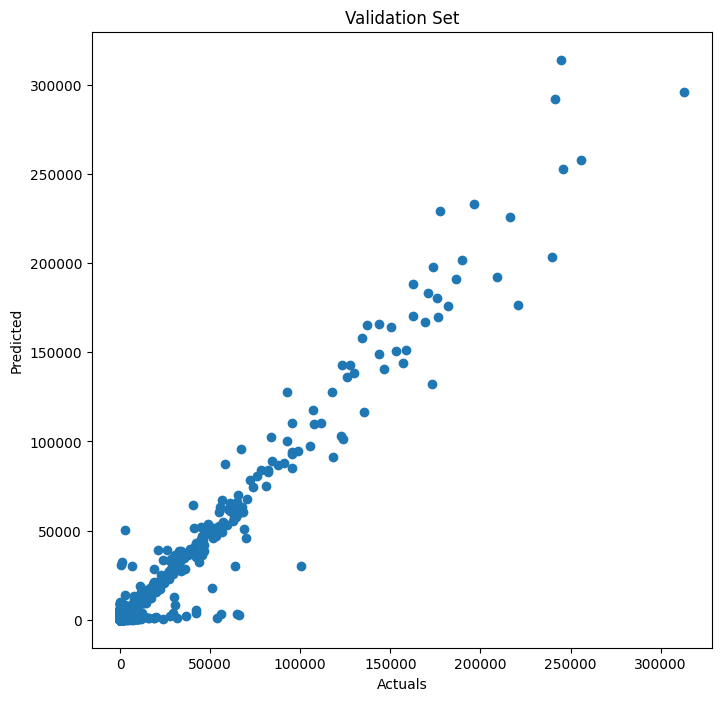

In [373]:
rf_best_model = grid_search.best_estimator_
train_predictions_rf, val_predictions_rf = evaluateRegression(rf_best_model, X_train, y_train, X_val, y_val)

In [374]:
best_params = grid_search.best_params_
rf_model = RandomForestRegressor(**best_params)
rf_model = rf_model.fit(X, y)

### Optional bonus: XGBoost!

If you do not want to run through these cells, comment out or delete them!

A popular decision tree algorithm is eXtreme Gradient Boosting. Here are a couple of resources to get you started on your learning journey if you're interested!

[Quick intuition video](https://www.youtube.com/watch?v=TyvYZ26alZs)

[Article with more detail](https://www.nvidia.com/en-us/glossary/data-science/xgboost/)

[Python tutorial, start at step 2!](https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/)

To install xgboost into your environment...

1. If open, close out any active jupyter notebooks and if necessary, terminate the instance by running Ctrl-C in anaconda prompt.

2. If not activated, activate your DSDP environment

*conda activate yourDSDPenvironmentName*

2. Install xgboost

*conda install xgboost*

Verify that it installed by running the following line.



In [375]:
from xgboost import XGBRegressor

In [376]:
xgb = XGBRegressor()

In [377]:
#TODO: feel free to change these parameters to try out different tuning options!
param_grid =  {'learning_rate': [.02, .03], #so called `eta` value
              'max_depth': [ 10],
              "min_child_weight": [5, 7],
              'gamma':[0.1, 0.2],
              'n_estimators': [500]
            }

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,  # parameters to be tuned
                           cv=5,
                           n_jobs=-1,  # -1 means use all available cores
                           verbose=2)

In [378]:
grid_search.fit(X_train, y_train)

print("Best CV accuracy: {}, with parameters: {}".format(
    grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best CV accuracy: 0.9665882389665594, with parameters: {'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 10, 'min_child_weight': 7, 'n_estimators': 500}


Model Performance
Train RMSE = 2631.55.
Train MAE = 722.59.
Test RMSE = 3566.04.
Test MAE = 906.48.


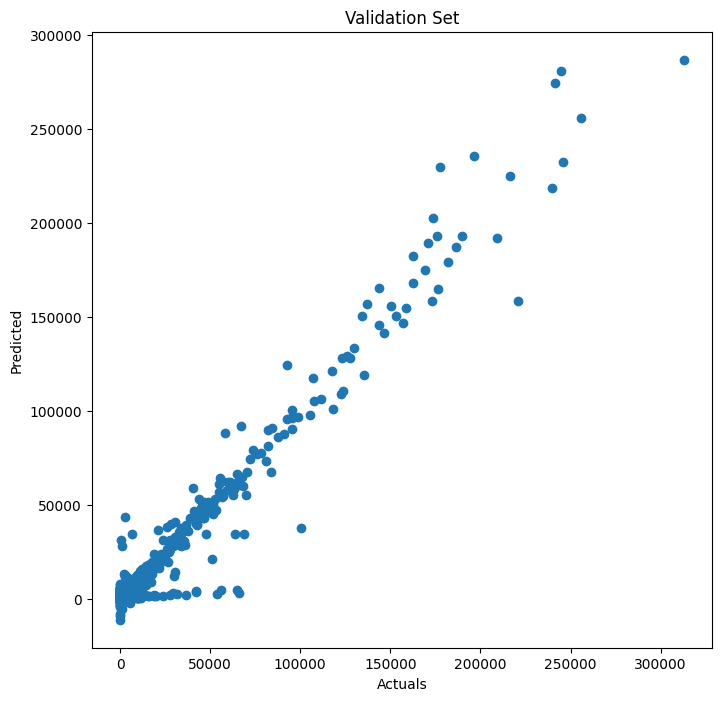

In [379]:
xgb_best_model = grid_search.best_estimator_
train_predictions_xgb, val_predictions_xgb = evaluateRegression(xgb_best_model, X_train, y_train, X_val, y_val) 


In [380]:
best_params = grid_search.best_params_
xgb_model = XGBRegressor(**best_params)
full_fit = xgb_model.fit(X, y)

In [381]:
#TODO: try any other models that you're interested in seeing its performance.


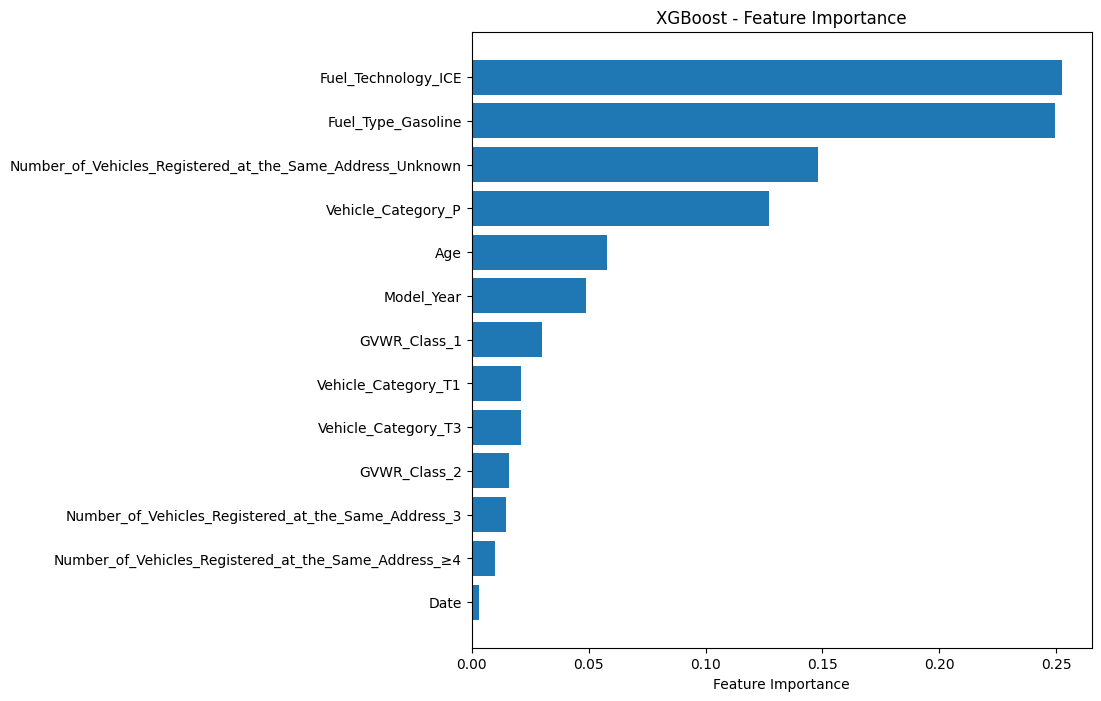

Features with importance close to zero:
'Date',


In [382]:
# identify importance and remove features
# Get feature importances

importances = xgb_model.feature_importances_

# Get feature names

feature_names = train_df.columns

 

 

# Get column names as feature names

feature_names = X.columns

 

# Sort the features by importance

sorted_idx = np.argsort(importances)

 

# Plot feature importances

plt.barh(range(X.shape[1]), importances[sorted_idx], align="center")

plt.yticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx])

plt.xlabel("Feature Importance")

plt.title("XGBoost - Feature Importance")

plt.show()

 

# Get column names as feature names

feature_names = X.columns

 

# Define a threshold for feature importance

threshold = 0.01  # Adjust this threshold as needed

 

# Filter features with importance close to zero

low_importance_features = [feature_names[i] for i in range(len(importances)) if importances[i] < threshold]

 

# Print the list of features with low importance

print("Features with importance close to zero:")

for feature in low_importance_features:

    print(f"'{feature}',")

## <span style="color:red">Model Submission</span>

### Create submission for test set

In [384]:
#TODO: assign the model that preformed the best as your selected model!
selected_model = xgb_model

In [385]:
test_df = pd.read_excel('Vehicle_Population_Train_Test_use.xlsx', sheet_name = 'test')
test_df = test_df.rename(columns=rename_columns_dict)
test_df['Age'] = test_df.Date - test_df.Model_Year
test_df['Age'] = test_df['Age'].astype(int)
test_df.reset_index(drop = True, inplace = True)

In [386]:
X = feature_engineering(continuous_variables, categorical_variables, test_df, one_hot_encoder)
X = X[['Date','Fuel_Technology_ICE', 'Fuel_Type_Gasoline', 'Vehicle_Category_P', 'Number_of_Vehicles_Registered_at_the_Same_Address_Unknown', 'GVWR_Class_1', 'Model_Year', 'Vehicle_Category_T3', 'Vehicle_Category_T1', 'GVWR_Class_2', 'Number_of_Vehicles_Registered_at_the_Same_Address_3', 'Number_of_Vehicles_Registered_at_the_Same_Address_≥4', 'Age']]


In [387]:
# Which model did the best? Which one would you like to use to predict?
predictions = selected_model.predict(X)

In [388]:
s = pd.Series(predictions, name = 'Vehicle_Population')
i = []
for s_i in s.index:
    i.append("row_" + str(s_i+1))
s.index = i
s.index.name = 'ID'

In [389]:
s.to_csv('submission.csv', index=True)